In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Projeto 2 de Algebra Linear Numérica
Considere um conjunto de pontos igualmente espaçados $t_i = \frac{i}{m}$ para $i = 0, . . . , m$

**a. Regressão linear. Formule o problema de encontrar $\alpha$ e $\beta$ tais que $f (t) = \alpha + \beta t$ seja a melhor aproximação em mínimos quadrados para os pontos $(t_i , b_i )$. Ou seja, dê, em função de $t_i$ , $b_i$ e $m$, o sistema de equações que devemos resolver para encontrar $\alpha$ e $\beta$.**

Aqui, temos uma simples regressão linear! Temos os vetores 
$$
t = \begin{bmatrix} t_1 \\ t_2 \\ t_3 \\ \vdots \\ t_m \end{bmatrix}, b = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_m \end{bmatrix}
$$
Para cada entrada desses vetores, temos uma equação $b_j = \alpha + \beta t_j$, podemos reescrever como o sistema
$$
\begin{bmatrix} 1 & t_1 \\ 1 & t_2 \\ 1 & t_3 \\ \vdots \\ 1 & t_m \end{bmatrix}
\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_m \end{bmatrix}
$$
Queremos que a soma quadrada dos erros seja a menor possível, então, podemos escrever a função de erro:
$$
E(\alpha, \beta) = \frac{1}{2} \sum_{i = 0}^m(b_i - (\alpha + \beta t_i))^2
$$
Queremos então minimizar essa função, podemos escrever seu gradiente e igualá-lo a $0$ correto?
$$
\frac{\partial E}{\partial \alpha}(\alpha, \beta) = \frac{1}{2} 2 \sum_{i = 0}^m{b_i - \alpha - \beta t_i} = \sum_{i = 0}^m{b_i - \alpha - \beta t_i}

\\

\frac{\partial E}{\partial \beta}(\alpha, \beta) = \frac{1}{2} 2 \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i = \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i

\\

\nabla E(\alpha, \beta) = \sum_{i = 0}^m \begin{bmatrix}
    b_i - \alpha - \beta t_i \\
    (b_i - \alpha - \beta t_i)t_i
\end{bmatrix}
$$

Se igualarmos a 0 e reescrevermos deixando o somatório dentro e separando em vários somatórios temos:
$$
\sum_{i = 0}^m \begin{bmatrix}
    b_i - \alpha - \beta t_i \\
    (b_i - \alpha - \beta t_i)t_i
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i) \\
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i = 0}^m b_i - \sum_{i = 0}^m\alpha - \beta \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i
\end{bmatrix} = 0
$$

Ou seja, temos dois sistemas de equações para serem resolvidos:
$$
\begin{cases} 
  \sum_{i = 0}^m b_i = (m+1)\alpha + \beta \sum_{i = 0}^mt_i \\
  \sum_{i = 0}^mt_ib_i = \alpha\sum_{i = 0}^mt_i + \beta\sum_{i = 0}^m t_i^2
\end{cases}
$$

Ou, reescrevendo com matrizes:
$$
\begin{bmatrix}
    \sum_{i = 0}^m b_i \\
    \sum_{i = 0}^mt_ib_i
\end{bmatrix} =

\begin{bmatrix}
    m+1 & \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^mt_i & \sum_{i = 0}^m t_i^2
\end{bmatrix}

\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}
$$

Ou seja, criamos um novo sistema $A x = c$

Vamos fazer um exemplo usando python e mostrando visualmente e resolvendo da forma que mostramos

In [2]:
np.random.seed(0)  # Definindo uma seed

# Gerando pontos aleatórios
m = 20  # Decidindo quantos pontos eu terei
t = np.array([i/m for i in range(m+1)]).reshape((-1, 1))  # Gerando t
b = np.random.random_sample((t.shape[0], 1))  # Gerando b

Agora que defini as $b$, $t$ e $m$, vamos ver como fica plotando os pontos no gráfico!

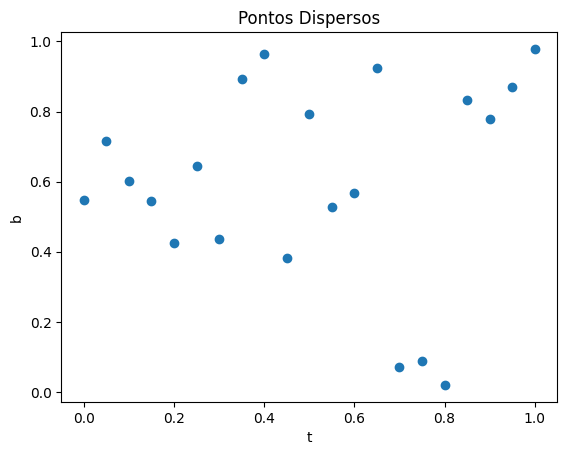

In [3]:
plt.scatter(t, b)
plt.title("Pontos Dispersos")
plt.ylabel('b')
plt.xlabel('t')
plt.show()

Vamos agora fazer o algoritmo para encontrar a reta $f(x) = \alpha + \beta t$ utilizando
$$
\begin{bmatrix}
    \sum_{i = 0}^m b_i \\
    \sum_{i = 0}^mt_ib_i
\end{bmatrix} =

\begin{bmatrix}
    m+1 & \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^mt_i & \sum_{i = 0}^m t_i^2
\end{bmatrix}

\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}
$$

In [4]:
# Calculando
c = np.array([
    b.sum(),
    (t.T @ b)[0,0]
]).reshape(-1, 1)

A = np.array([
    m + 1, t.sum(),
    t.sum(), np.linalg.norm(t)**2
]).reshape(2, 2)


coefficients = np.linalg.solve(A, c)
coefficients

array([[0.5759977 ],
       [0.04892982]])

Encontramos os nossos coeficientes! Vamos vizualisar como isso fica no gráfico!

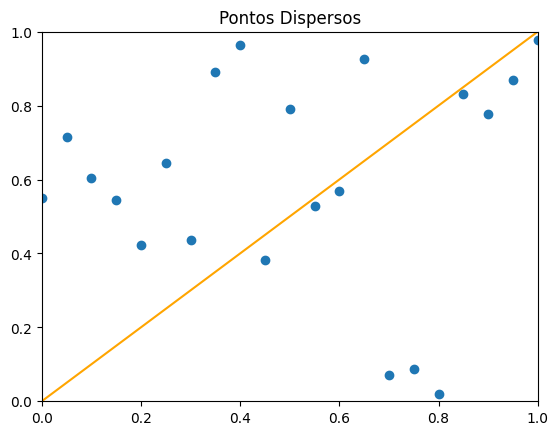

In [5]:
x = np.linspace(-100, 100, 1000) * coefficients[1] + coefficients[0]
y = np.linspace(-100, 100, 1000) * coefficients[1] + coefficients[0]

plt.plot(x,y, color="orange", label="Regressão Linear")
plt.scatter(t, b)
plt.title("Pontos Dispersos")
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.show()

**b. Calcule (numericamente), para vários valores de $m$, o condicionamento da matriz $A$
correspondente. O que parece acontecer?**

Show, apenas lembrando a definição de condicionamento de uma matriz
$$
\kappa(A) = \|A\|\|A^{-1}\|
$$

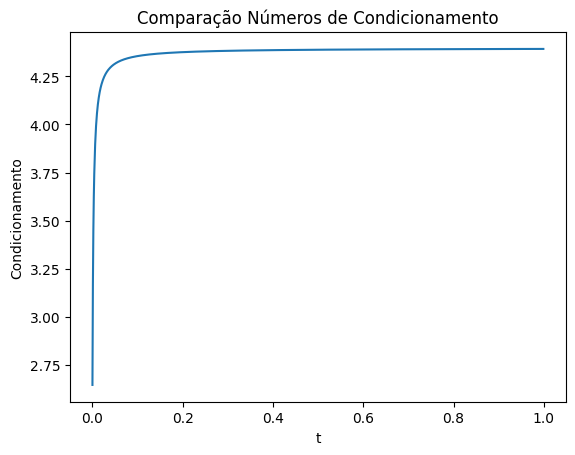

In [6]:
np.random.seed(0)
# Gerando pontos aleatórios
m = 1000  # Decidindo quantos pontos eu terei

conditions = []


for j in range(m):
    if j == 0:
        continue

    t = np.array([[1, i/(j)] for i in range(j+1)]).reshape((-1, 2))  # Gerando t

    linear_eq_matrix = t.T @ t

    conditions.append(
        np.sqrt( np.linalg.norm(linear_eq_matrix) * np.linalg.norm(np.linalg.solve(linear_eq_matrix, np.eye(2))) )
    )


plt.title("Comparação Números de Condicionamento")
plt.xlabel("t")
plt.ylabel("Condicionamento")

plt.plot(t[:-1, 1], conditions)

plt.show()

Essa curva parece estar convergindo para um valor, vamos ver os condicionamentos computados:

In [7]:
conditions

[np.float64(2.6457513110645907),
 np.float64(3.1688588903052577),
 np.float64(3.4480268109295342),
 np.float64(3.62284418654736),
 np.float64(3.742929842987149),
 np.float64(3.830614978187068),
 np.float64(3.8974961437410296),
 np.float64(3.9502109648304438),
 np.float64(3.9928387073310323),
 np.float64(4.028026812224566),
 np.float64(4.057569403456886),
 np.float64(4.08272590234157),
 np.float64(4.104406637524339),
 np.float64(4.1232860797230755),
 np.float64(4.1398746468345236),
 np.float64(4.154565761504645),
 np.float64(4.167667578439486),
 np.float64(4.179424911706464),
 np.float64(4.190034722701425),
 np.float64(4.199657273173753),
 np.float64(4.208424296415603),
 np.float64(4.216445077421154),
 np.float64(4.223811041008454),
 np.float64(4.23059925843492),
 np.float64(4.23687515878284),
 np.float64(4.2426946479163306),
 np.float64(4.24810578076437),
 np.float64(4.253150093082269),
 np.float64(4.257863670952286),
 np.float64(4.262278016376794),
 np.float64(4.266420752932803),
 np.

Podemos ver o (visualmente) aparente crescimento logaritmico ou seguindo $f(x) = \sqrt{x}$ da norma conforme aumentamos a quantidade de pontos. Eu também aumentei a quantidade de pontos e, aparentemente, o valor está **convergindo**, mas vamos conferir se isso é verdade

Sabemos que $T^{*}T$ tem autovalores igual ao quadrado dos valores singulares de $T$, e sabemos que
$$
T^{*}T =
\begin{bmatrix}
    1 & 1 & ... & 1 \\
    t_0 & t_1 & ... & t_m
\end{bmatrix}

\begin{bmatrix}
    1 & t_0 \\
    \vdots & \vdots \\
    1 & t_m
\end{bmatrix}

=

\begin{bmatrix}
    m + 1 & \sum_{j = 0}^mt_j \\
    \sum_{j = 0}^mt_j & \sum_{j = 0}^mt_j^2
\end{bmatrix}

=

\begin{bmatrix}
    m + 1 & \sum_{j = 0}^mt_j \\
    \sum_{j = 0}^mt_j & \|t\|_2^2
\end{bmatrix}
$$

Calculando os autovalores de $T^{*}T$, temos
$$
    det(\begin{bmatrix}
        m + 1 & \sum_{j = 0}^mt_j \\
        \sum_{j = 0}^mt_j & \|t\|_2^2
    \end{bmatrix} - \lambda I) = 0
$$
$$
    det(\begin{bmatrix}
        m + 1 - \lambda & \sum_{j = 0}^mt_j \\
        \sum_{j = 0}^mt_j & \|t\|_2^2 - \lambda
    \end{bmatrix}) = 0
$$

Vou deixar tudo em função de $m$, veja:
$$
\sum_{j = 0}^mt_j = \frac{1}{m}\sum_{j = 0}^mj = \frac{1}{m}\frac{m(m+1)}{2} = \frac{m+1}{2}
$$
$$
\sum_{j=0}^m{t_j^2} = \sum_{j=1}^m{\frac{j^2}{m^2}} = \frac{1}{m^2}\sum_{j=1}^m{j^2} = \frac{1}{m^2}\frac{m(m+1)(2m+1)}{6} = \frac{(m+1)(2m+1)}{6m}
$$

Logo, eu tenho
$$
det(\begin{bmatrix}
    m + 1 - \lambda & \frac{m+1}{2} \\
    \frac{m+1}{2} & \frac{(m+1)(2m+1)}{6m} - \lambda
\end{bmatrix}) = 0
$$
$$
(m + 1 - \lambda)(\frac{(m+1)(2m+1)}{6m} - \lambda) - \frac{(m+1)^2}{4} = 0
$$

Por questões de leitura, vou escrever $f(m) = \frac{(m+1)(2m+1)}{6m}$
$$
(m + 1 - \lambda)(f(m) - \lambda) - \frac{(m+1)^2}{4} = 0
$$
$$
\lambda^2 - (m+1+f(m))\lambda + (m + 1)f(m) - \frac{(m+1)^2}{4} = 0
$$

Calculando a equação de 2º grau:
$$
\Delta = \left[f(m) + m + 1\right]^2 - 4\left[(m+1)f(m) - \frac{(m+1)^2}{4}\right]
$$

Perceba que:
$$
f(m) = \frac{m}{3} + \frac{1}{2} + \frac{1}{6m}
$$
    
Logo, se eu faço $m \rightarrow \infin$, eu tenho que $f(m) \le \frac{m}{3} + \frac{1}{2}$. Isso quer dizer que eu posso substituir por esse novo valor sem $\frac{1}{6m}$, então eu vou substituir
$$
f(m) + m + 1 \approx \frac{m}{3} + \frac{1}{2} + m + 1 = \frac{4m}{3} + \frac{3}{2}
$$
$$
(m+1)f(m) \approx (m+1)(\frac{m}{3} + \frac{1}{2}) = \frac{2m^2 + 5m + 3}{6}
$$

Substituindo tudo isso em $\Delta$:
$$
\Delta(m) = \left[ \frac{4m}{3} + \frac{3}{2} \right]^2 - 4\left[ \frac{2m^2 + 5m + 3}{6} - \frac{m^2 + 2m + 1}{4} \right]
$$
$$
\Delta(m) = \frac{16m^2}{9} + 4m + \frac{9}{4} - 4\left[ \frac{m^2 + 4m + 3}{12} \right]
$$
$$
\Delta(m) = \frac{16m^2}{9} + 4m + \frac{9}{4} - \frac{m^2 + 4m + 3}{3}
$$
$$
\Delta(m) = \frac{52m^2 + 96m + 45}{36}
$$

Trocando nem $\lambda$:
$$
\lambda(m) = \frac{-b \pm \sqrt{\Delta}}{2 a}
$$
$$
\lambda(m) = \frac{m+1+f(m) \pm \sqrt{\frac{52m^2 + 96m + 45}{36}}}{2}
$$
$$
\lambda(m) = \frac{\frac{4m}{3} + \frac{3}{2} \pm \sqrt{\frac{52m^2 + 96m + 45}{36}}}{2}
$$
$$
\lambda(m) = \frac{8m + 9 \pm \sqrt{52m^2 + 96m + 45}}{12}
$$

Ótimo! Agora, sabemos que esse valor é o quadrado dos valores singulares de $T$! Então, para calcular o condicionamento de $T$, basta que eu faça:
$$
\kappa(A) = \sqrt{\frac{\lambda_{max}}{\lambda_{min}}}
$$
$$
\kappa(A) = \sqrt{\frac{
    \frac{8m + 9 + \sqrt{52m^2 + 96m + 45}}{12}
}{
    \frac{8m + 9 - \sqrt{52m^2 + 96m + 45}}{12}
}} =
\sqrt{\frac{
    8m + 9 + \sqrt{52m^2 + 96m + 45}
}{
    8m + 9 - \sqrt{52m^2 + 96m + 45}
}}
$$

Então tiramos o limite desse condicionamento
$$
\lim_{m \rightarrow \infin}{\kappa(m)} = \lim_{m \rightarrow \infin}{\sqrt{\frac{
    8m + 9 + \sqrt{52m^2 + 96m + 45}
}{
    8m + 9 - \sqrt{52m^2 + 96m + 45}
}}}
$$
$$
\lim_{m \rightarrow \infin}{\sqrt{\frac{
    m(8 + \frac{9}{m} + \sqrt{52 + \frac{96}{m} + \frac{45}{m^2}})
}{
    m(8 + \frac{9}{m} - \sqrt{52 + \frac{96}{m} + \frac{45}{m^2}})
}}}

=

\sqrt{\frac{
    8 + \sqrt{52}
}{
    8 - \sqrt{52}
}} \approx 4.391067
$$

O que condiz com os valores de condicionamento antes computados